In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
X = np.arange(0.2,1,.1)

In [3]:
print(X)

[ 0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9]


In [4]:
P = 10.**np.arange(-7,1,1) # note that we raise 10. (float) and not 10 (int)

In [6]:
print(P)

[  1.00000000e-07   1.00000000e-06   1.00000000e-05   1.00000000e-04
   1.00000000e-03   1.00000000e-02   1.00000000e-01   1.00000000e+00]


In [7]:
for x,p in zip(X,P):
    print('%f,%f'%(x,p))

0.200000,0.000000
0.300000,0.000001
0.400000,0.000010
0.500000,0.000100
0.600000,0.001000
0.700000,0.010000
0.800000,0.100000
0.900000,1.000000


In [8]:
# the logistic function takes a parameter a and input value x
def logistic(a,x):
    return a*x*(1-x)

In [9]:
#gen_orbit takes in a function F that receives parameter a and seed value x0, and iterates 
#for at most n iterations.
def gen_orbit(F,a,x0,n):
    x1 = x0
    x2 = F(a,x1)
    
    X0 = [x0]
    X1 = [x1]
    
    for i in range(n):
        X0.extend([x1,x1])
        X1.extend([x2,x2])

        x1 = x2
        x2 = F(a,x2)
        
        # vanishing to zero
        if np.abs(X0[-1] - X1[-1]) < 10**(-8):
            break
        
    return X0,X1

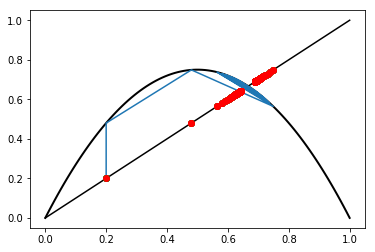

In [10]:
# using the logistic map

# change these parameter values as you wish, then rerun this cell to see the plot change
a = 3 # a more interesting value: a = 4
x0 = 0.2
X0, X2 = gen_orbit(logistic,a,x0,100)

# a linear space/grid for plotting reference curves
x_grid = np.linspace(0,1,100)

# layer on the various functions

# first, layer on the logistic and identity functions for reference
plt.plot(x_grid,map(lambda z: logistic(a,z),x_grid), 'k', linewidth=2)
plt.plot(x_grid,x_grid, 'k')

# now layer on the orbits
plt.plot(X0,X2)
plt.plot(X0,X0,'go')
plt.plot(X2,X2,'ro')

plt.show() # the final product!

In [11]:
plt.clf() # clear the figure

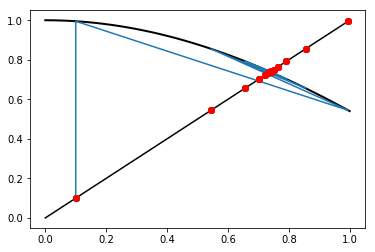

In [12]:
# now using cosine

# this wrapped cosine function takes a parameter a and input value x
def npcos(a,x):
    return a*np.cos(x)

# parameters
a = 1
x0 = 0.1
X0, X2 = gen_orbit(npcos,a,x0,100)
x_grid = np.linspace(0,1,100)

# layer on the reference functions
plt.plot(x_grid,map(lambda z: npcos(a,z),x_grid), 'k', linewidth=2)
plt.plot(x_grid,x_grid, 'k')

# layer the orbits
plt.plot(X0,X2)
plt.plot(X0,X0,'go')
plt.plot(X2,X2,'ro')

plt.show()

In [13]:
plt.clf() # clear the figure

In [14]:
from numpy import linalg 

A = np.diag((1,2,3))

w,v = linalg.eig(A)

print 'w =',w
print'and v =',v

w = [ 1.  2.  3.]
and v = [[ 1.  0.  0.]
 [ 0.  1.  0.]
 [ 0.  0.  1.]]
